<a href="https://colab.research.google.com/github/August49/recommendation-System/blob/master/userBased.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Movie Recommendation System**

User-based nearest neighbor recommendation system
Cluster analysis is a technique used to group similar objects into respective categories.
It is a common technique used in data mining and statistical data analysis.
The main goal of cluster analysis is to partition a set of objects
into clusters such that objects in the same cluster are more similar
to each other than to objects in other clusters. The similarity between objects
is measured using a distance measure. such as Euclidean distance, Manhattan distance,Minkowski distance,
Pearson correlation, and Cosine similarity.The first two are distance measures, are sensitive to the scale of the data.
The last three are similarity measures, are not sensitive to the scale of the data. Between the pearson correlation and cosine similarity,
pearson correlation is more sensitive to the magnitude of the rating values, and cosine similarity is not sensitive to the magnitude of the rating values.
Since our recommendation system is based on the similarity between users rating, we will use cosine similarity as our distance measure,
because it is not sensitive to the magnitude of the rating values.


user based collaborative filtering
user based collaborative filtering is a technique used to predict the items that a user might like on the basis of ratings by similar users.
The basic idea behind this filtering is that similar users share the same interest and that similar items are liked by a user.
The similarity between users is calculated by using the cosine similarity measure.
The similarity between items is calculated by using the Pearson correlation similarity measure.


**Data Source**: https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Movies%20Recommendation.csv

**Relevant Papers**:
* F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4, Article 19 (December 2015), 19 pages. DOI=http://dx.doi.org/10.1145/2827872
* http://files.grouplens.org/papers/harper-tiis2015.pdf
PU text classification enhanced by term frequency-inverse document frequency-improved weighting scheme
https://www.sciencedirect.com/science/article/pii/S0957417416300262
by using the


In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#read the data
df = pd.read_csv("https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Movies%20Recommendation.csv")
df.head()

,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Budget,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,...,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,Movie_Spoken_Language,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director
0,1,Four Rooms,Crime Comedy,en,4000000,22.876230,09-12-1995,4300000,98.0,6.5,...,NaN,hotel new year's eve witch bet hotel room,It's Ted the Bellhop's first night on the job....,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,"[{'name': 'Allison Anders', 'gender': 1, 'depa...",Allison Anders
1,2,Star Wars,Adventure Action Science Fiction,en,11000000,126.393695,25-05-1977,775398007,121.0,8.1,...,http://www.starwars.com/films/star-wars-episod...,android galaxy hermit death star lightsaber,Princess Leia is captured and held hostage by ...,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,"[{'name': 'George Lucas', 'gender': 2, 'depart...",George Lucas
2,3,Finding Nemo,Animation Family,en,94000000,85.688789,30-05-2003,940335536,100.0,7.6,...,http://movies.disney.com/finding-nemo,father son relationship harbor underwater fish...,"Nemo, an adventurous young clownfish, is unexp...","[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
3,4,Forrest Gump,Comedy Drama Romance,en,55000000,138.133331,06-07-1994,677945399,142.0,8.2,...,NaN,vietnam veteran hippie mentally disabled runni...,A man with a low IQ has accomplished great thi...,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Robert Zemeckis
4,5,American Beauty,Drama,en,15000000,80.878605,15-09-1999,356296601,122.0,7.9,...,http://www.dreamworks.com/ab/,male nudity female nudity adultery midlife cri...,"Lester Burnham, a depressed suburban father in...","[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes


In [ ]:
#describe the data
df.describe()

,Movie_ID,Movie_Budget,Movie_Popularity,Movie_Revenue,Movie_Runtime,Movie_Vote,Movie_Vote_Count
count,4760.000000,4.760000e+03,4760.000000,4.760000e+03,4758.000000,4760.000000,4760.000000
mean,2382.566387,2.920129e+07,21.599510,8.263743e+07,107.184111,6.113866,692.508403
std,1377.270159,4.075620e+07,31.887919,1.630554e+08,21.960332,1.141294,1235.007337
min,1.000000,0.000000e+00,0.000372,0.000000e+00,0.000000,0.000000,0.000000
25%,1190.750000,9.257500e+05,4.807074,0.000000e+00,94.000000,5.600000,55.000000
50%,2380.500000,1.500000e+07,13.119058,1.944716e+07,104.000000,6.200000,238.000000
75%,3572.250000,4.000000e+07,28.411929,9.341276e+07,118.000000,6.800000,740.250000
max,4788.000000,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [ ]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie_ID                  4760 non-null   int64  
 1   Movie_Title               4760 non-null   object 
 2   Movie_Genre               4760 non-null   object 
 3   Movie_Language            4760 non-null   object 
 4   Movie_Budget              4760 non-null   int64  
 5   Movie_Popularity          4760 non-null   float64
 6   Movie_Release_Date        4760 non-null   object 
 7   Movie_Revenue             4760 non-null   int64  
 8   Movie_Runtime             4758 non-null   float64
 9   Movie_Vote                4760 non-null   float64
 10  Movie_Vote_Count          4760 non-null   int64  
 11  Movie_Homepage            1699 non-null   object 
 12  Movie_Keywords            4373 non-null   object 
 13  Movie_Overview            4757 non-null   object 
 14  Movie_Pr

In [ ]:
#check data shape

df.shape

(4760, 21)

In [ ]:
df.columns

In [ ]:
#data preprocessing
#feature selection
features= df[['Movie_Genre','Movie_Keywords','Movie_Tagline','Movie_Cast', 'Movie_Director']]
features.head()

NameError: name 'df' is not defined

In [ ]:
#print genres
features['Movie_Genre']
#Since the genres are separated by " ", we will split the genres and create a list of genres

In [ ]:

# Split the 'Movie_Genre' column by spaces and stack the resulting Series
split_genres = features['Movie_Genre'].str.split(expand=True).stack()
#explode the genres column
split_genres = split_genres.reset_index(level=1, drop=True).rename('Movie_Genre')
#join the genres column to the original dataframe
features = features.drop('Movie_Genre', axis=1).join(split_genres)
features.head()




,Movie_Keywords,Movie_Tagline,Movie_Cast,Movie_Director,Movie_Genre
0,hotel new year's eve witch bet hotel room,Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,Allison Anders,Crime
0,hotel new year's eve witch bet hotel room,Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,Allison Anders,Comedy
0,hotel new year's eve witch bet hotel room,Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,Allison Anders,Crime
0,hotel new year's eve witch bet hotel room,Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,Allison Anders,Comedy
1,android galaxy hermit death star lightsaber,"A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,George Lucas,Adventure


In [ ]:
features

,Movie_Keywords,Movie_Tagline,Movie_Cast,Movie_Director,Movie_Genre
0,hotel new year's eve witch bet hotel room,Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,Allison Anders,Crime
0,hotel new year's eve witch bet hotel room,Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,Allison Anders,Comedy
1,android galaxy hermit death star lightsaber,"A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,George Lucas,Adventure
1,android galaxy hermit death star lightsaber,"A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,George Lucas,Action
1,android galaxy hermit death star lightsaber,"A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,George Lucas,Science
...,...,...,...,...,...
4756,NaN,It’s better to stand out than to fit in.,Roni Akurati Brighton Sharbino Jason Lee Anjul...,Frank Lotito,Drama
4757,christian film sex trafficking,She never knew it could happen to her...,Nicole Smolen Kim Baldwin Ariana Stephens Brys...,Jaco Booyens,Thriller
4757,christian film sex trafficking,She never knew it could happen to her...,Nicole Smolen Kim Baldwin Ariana Stephens Brys...,Jaco Booyens,Drama
4758,NaN,NaN,NaN,NaN,Family


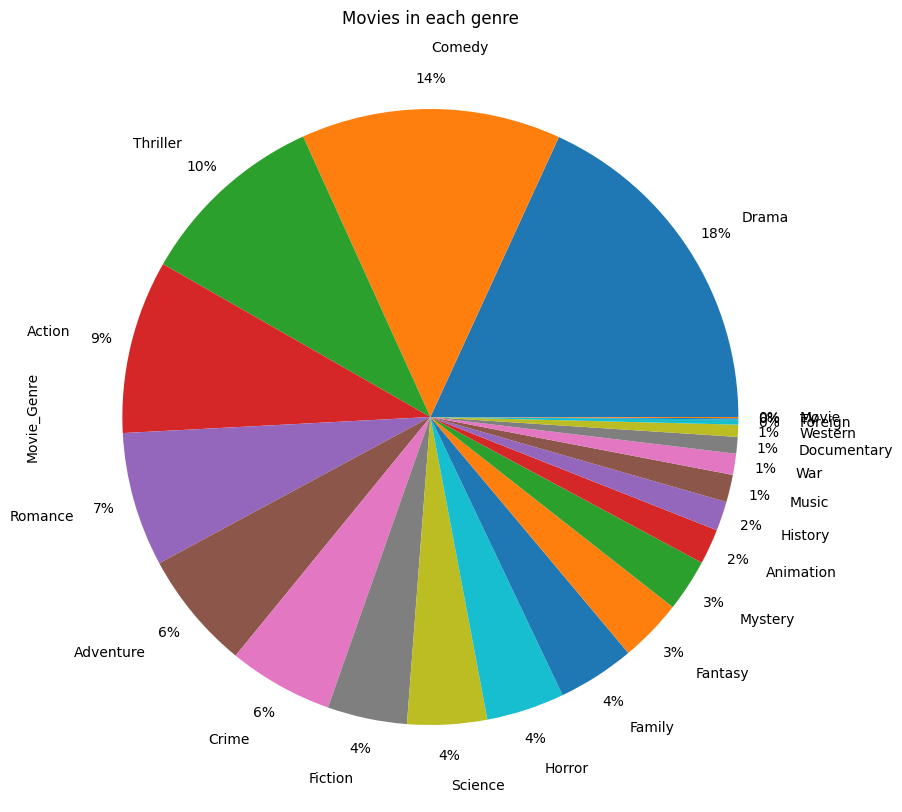

In [ ]:
#data visualization
#a pie chart for movies in each genre
features['Movie_Genre'].value_counts().plot(kind='pie', autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2, figsize=(10,10))
plt.title('Movies in each genre')
plt.show()


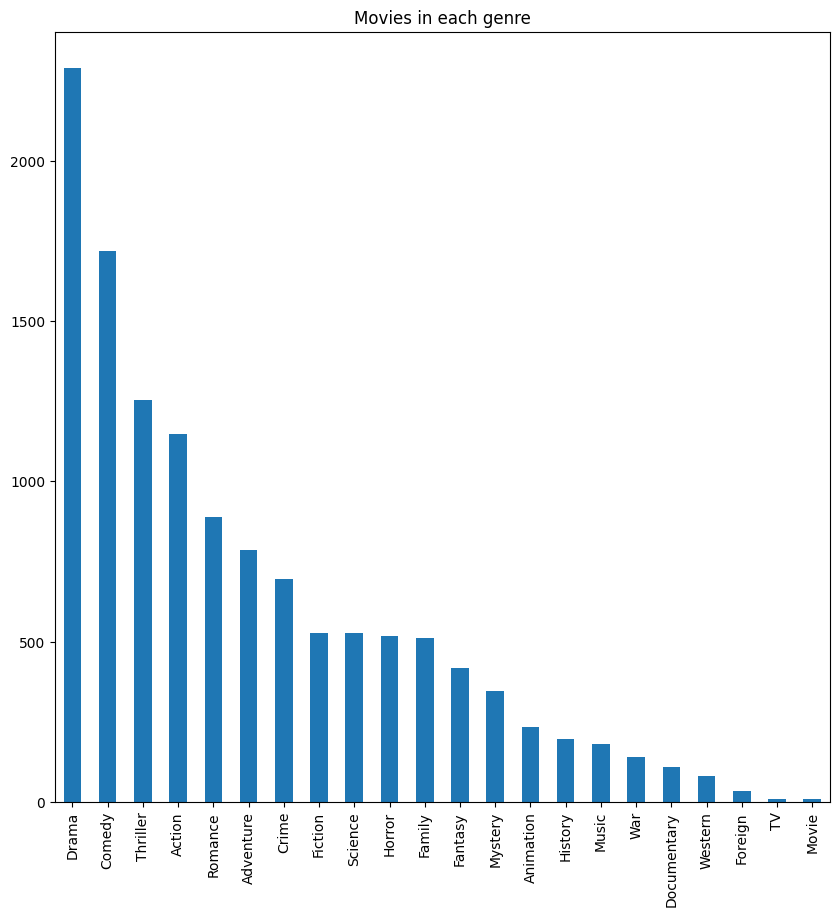

In [ ]:
#a bar chart for movies in each genre
features['Movie_Genre'].value_counts().plot(kind='bar', figsize=(10,10))
plt.title('Movies in each genre')
plt.show()


In [ ]:
X = features['Movie_Genre'] + ' '  + features['Movie_Keywords'] + ' ' + features['Movie_Tagline'] + ' ' + features['Movie_Cast'] + ' ' + features['Movie_Director']

In [ ]:
X

In [ ]:
#handle NaN values
X.fillna('Unknown', inplace=True)

In [ ]:
X

In [ ]:
#get feature text conversion to token
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)


In [ ]:
X.shape

In [ ]:
print(X)

In [ ]:
#get cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
similarity_score = cosine_similarity(X)

In [ ]:
similarity_score

In [ ]:
movie_title = input("Enter a movie Title: ")



In [ ]:
All_movie_titles_list = df['Movie_Title'].tolist()

In [ ]:
# The difflib module contains tools for computing and working with differences between sequences.
import difflib

In [ ]:
movie_recommendation = difflib.get_close_matches(movie_title, All_movie_titles_list)
movie_recommendation

['Feast', 'Beastly', 'The East']

In [ ]:
closest_movie_title = movie_recommendation[0]
closest_movie_title

'Feast'

In [ ]:
index_of_closest_movie_title = All_movie_titles.index(closest_movie_title)

In [ ]:
#get the similarity score of the movie title entered by the user with all the movie titles in the dataset
similarity_score_of_closest_movie_title = similarity_score[index_of_closest_movie_title]

In [ ]:
#get all movies sorted in descending order of their similarity score with the movie title entered by the user
sorted_similar_movies = sorted(list(enumerate(similarity_score_of_closest_movie_title)), key=lambda x:x[1], reverse=True)
sorted_similar_movies
#print sorted_similar_movies

#display the first 10 movies
i=0
print("Top 10 similar movies to "+movie_title+" are:\n")
for movie in sorted_similar_movies:
    print(All_movie_titles[movie[0]])
    i=i+1
    if i>10:
        break




Top 10 similar movies to feast are:

Feast
The Brothers Solomon
A Nightmare on Elm Street 3: Dream Warriors
Reign of Assassins
Devil
Unstoppable
Another Year
Soul Surfer
The Mighty
Lake Placid
Mortal Kombat: Annihilation
